In [12]:
import numpy as np
import matplotlib.pyplot as plt


# ej 1

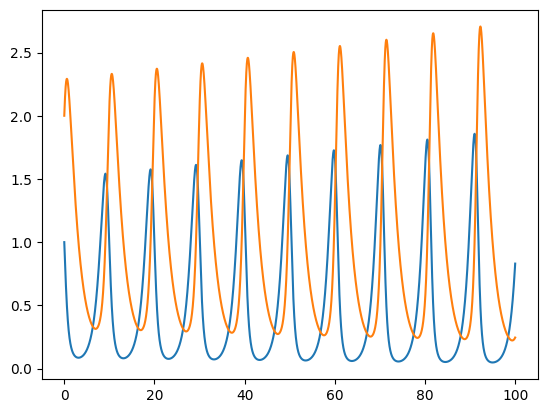

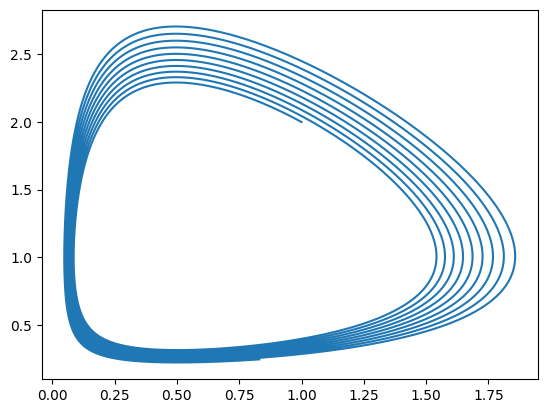

In [83]:

def metodo_euler_2var(x0, t0, f , h , N):

    x = x0
    t = t0
    valores_x = []
    valores_x.append(x)

    for i in range(N):
        x_sig =  x + h*f(0.5, x) # a = 1
        valores_x.append(x_sig)
        t = t + h 
        x =  x_sig
    return valores_x

x0 = np.array([1,2])
t0 = np.array([0,0])

def func(a,x):
   x1 = x[0]
   x2 = x[1]
   return np.array([x1 - x1*x2, -a*x2 + x1*x2])
   
h = 10**(-2)
N = 10000

valores  = metodo_euler_2var(x0, t0, func, h , N)
valores_x1 = [ x[0] for x in valores]
valores_x2 = [ x[1] for x in valores]
t_1 =  np.linspace(t0[0], t0[0]+ N * h, N+1)
t_2 =  np.linspace(t0[1], t0[1]+ N * h, N+1)

plt.plot(t_1, valores_x1)
plt.plot(t_2, valores_x2)
plt.show()
plt.plot(valores_x1, valores_x2)

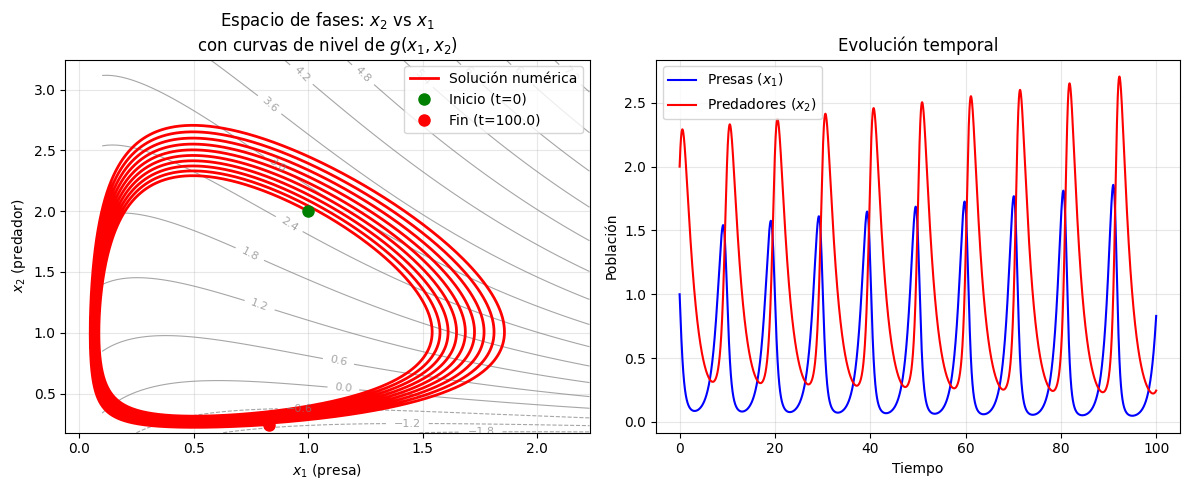

Variación de g a lo largo de la solución: 4.566539
Valor promedio de g: 0.748076
¿Es g aproximadamente constante? False


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función g(x1, x2) para las curvas de nivel
def g(x1, x2, theta):
    """
    g(x1, x2) = x1 * ln(x1^theta * x2) + x2
    Simplificando: x1 * (theta * ln(x1) + ln(x2)) + x2
    """
    return x1 * (theta * np.log(x1) + np.log(x2)) + x2

# PARÁMETROS (ajusta según tus valores)
theta = 1.0  # Del punto 1d

# TUS DATOS (ya calculados)
# valores = metodo_euler_2var(x0, t0, func, h, N)
valores_x1 = [x[0] for x in valores]  # presas
valores_x2 = [x[1] for x in valores]  # predadores

# Crear malla para curvas de nivel
x1_min, x1_max = min(valores_x1)*0.8, max(valores_x1)*1.2
x2_min, x2_max = min(valores_x2)*0.8, max(valores_x2)*1.2

x1_grid = np.linspace(max(0.1, x1_min), x1_max, 100)
x2_grid = np.linspace(max(0.1, x2_min), x2_max, 100)
X1, X2 = np.meshgrid(x1_grid, x2_grid)

# Calcular g en la malla
G = g(X1, X2, theta)

# Graficar
plt.figure(figsize=(12, 5))

# SUBPLOT 1: Espacio de fases con curvas de nivel
plt.subplot(1, 2, 1)
# Curvas de nivel
contour = plt.contour(X1, X2, G, levels=15, colors='gray', linewidths=0.8, alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)
# Solución numérica
plt.plot(valores_x1, valores_x2, 'r-', linewidth=2, label='Solución numérica')
plt.plot(valores_x1[0], valores_x2[0], 'go', markersize=8, label='Inicio (t=0)')
plt.plot(valores_x1[-1], valores_x2[-1], 'ro', markersize=8, label=f'Fin (t={N*h})')
plt.xlabel('$x_1$ (presa)')
plt.ylabel('$x_2$ (predador)')
plt.title('Espacio de fases: $x_2$ vs $x_1$\ncon curvas de nivel de $g(x_1, x_2)$')
plt.grid(True, alpha=0.3)
plt.legend()

# SUBPLOT 2: Evolución temporal
plt.subplot(1, 2, 2)
t = np.linspace(t0[0], t0[0] + N * h, N + 1)
plt.plot(t, valores_x1, 'b-', label='Presas ($x_1$)')
plt.plot(t, valores_x2, 'r-', label='Predadores ($x_2$)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evolución temporal')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Verificar si g es constante a lo largo de la solución
g_solution = g(np.array(valores_x1), np.array(valores_x2), theta)
variacion_g = np.max(g_solution) - np.min(g_solution)
print(f"Variación de g a lo largo de la solución: {variacion_g:.6f}")
print(f"Valor promedio de g: {np.mean(g_solution):.6f}")
print(f"¿Es g aproximadamente constante? {variacion_g < 0.01}")  # Umbral pequeño

# ej 2

In [108]:
N = 100
h = 1/N
u_o = 1
u_N = 1

vec_menos2 =  np.ones(N) * -2
vec_menos1 = np.ones(N-1) 

A = np.diag(vec_menos2)  + np.diag(vec_menos1,-1)+ np.diag(vec_menos1,1)
print(A)
b =  -h**2 * np.ones(N)
b[0] = b[0] - u_o
b[-1] = b[-1] - u_N
print(b)

sol= np.linalg.solve(A, b)  
np.linalg.inv(A) 

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[-1.0001e+00 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04 -1.0000e-04
 -1.0

array([[-0.99009901, -0.98019802, -0.97029703, ..., -0.02970297,
        -0.01980198, -0.00990099],
       [-0.98019802, -1.96039604, -1.94059406, ..., -0.05940594,
        -0.03960396, -0.01980198],
       [-0.97029703, -1.94059406, -2.91089109, ..., -0.08910891,
        -0.05940594, -0.02970297],
       ...,
       [-0.02970297, -0.05940594, -0.08910891, ..., -2.91089109,
        -1.94059406, -0.97029703],
       [-0.01980198, -0.03960396, -0.05940594, ..., -1.94059406,
        -1.96039604, -0.98019802],
       [-0.00990099, -0.01980198, -0.02970297, ..., -0.97029703,
        -0.98019802, -0.99009901]], shape=(100, 100))

In [112]:
np.linalg.cond(A) 

np.float64(4133.642926801001)

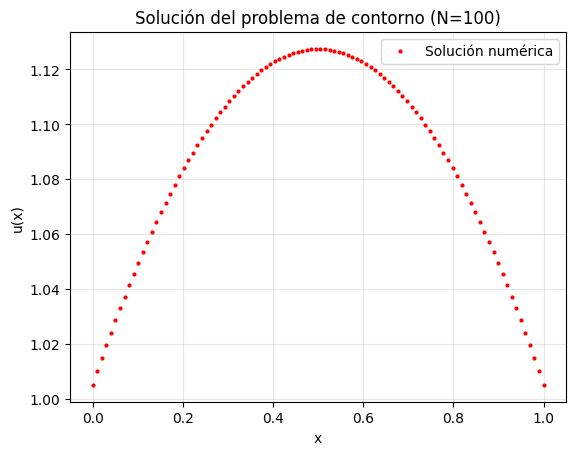

In [97]:
x = np.linspace(0, 1, N)

plt.plot(x, sol, 'ro', markersize=2, label='Solución numérica')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Solución del problema de contorno (N={N})')
plt.legend()
plt.grid(True, alpha=0.3)

# Ej 3

In [153]:
N = 100
h = 1/N
u_o = 1
u_N = 1

vec_menos2 =  np.ones(N) * -2
vec_menos1 = np.ones(N-1) 
L = np.diag(vec_menos1,-1)
D =  np.diag(vec_menos2) 
D_inv =  np.diag(np.ones(N)* (-1/2) )   
U = np.diag(vec_menos1,1)

A = L + D + U
b =   np.ones(N)

B_j =  D_inv @ (L+U)
C_j = D_inv @ b

def metodo_iterativo(B,C, x0, M):
    x = x0

    for i in range(N):
        x_sig = B @ x + C
        x = x_sig
    return x
x0 =  np.zeros(N)
# x0[0] = 1

sol = metodo_iterativo(B_j, C_j, x0, 100)
print(sol)

max(np.abs(np.linalg.eigvals(B_j))) 

[-4.60205381e-01  0.00000000e+00 -3.82176717e-01  0.00000000e+00
 -3.08649707e-01  0.00000000e+00 -2.42059207e-01  0.00000000e+00
 -1.84100809e-01  0.00000000e+00 -1.35626512e-01  0.00000000e+00
 -9.66739522e-02  0.00000000e+00 -6.66053096e-02  0.00000000e+00
 -4.43130401e-02  0.00000000e+00 -2.84439668e-02  0.00000000e+00
 -1.76001001e-02  0.00000000e+00 -1.04893678e-02 -1.11022302e-16
 -6.01648786e-03 -8.88178420e-16 -3.31856026e-03 -6.49480469e-15
 -1.75882086e-03 -4.13558077e-14 -8.94965196e-04 -2.41195952e-13
 -4.36859918e-04 -1.30284672e-12 -2.04388584e-04 -6.54892807e-12
 -9.15716124e-05 -3.07389669e-11 -3.92506982e-05 -1.35138123e-10
 -1.60800076e-05 -5.57954460e-10 -6.28957501e-06 -2.16868334e-09
 -2.34620631e-06 -7.95266425e-09 -8.33681325e-07 -2.75679038e-08
 -2.81814102e-07 -9.05001311e-08 -9.05001311e-08 -2.81814102e-07
 -2.75679038e-08 -8.33681325e-07 -7.95266425e-09 -2.34620631e-06
 -2.16868334e-09 -6.28957501e-06 -5.57954460e-10 -1.60800076e-05
 -1.35138123e-10 -3.92506

np.float64(0.9995162822919906)